Após gerar o arquivo via Etapa1.cpp, basta colocar o arquivo estatisticas.json junto a pasta desse arquivo .ipynb.

OBS.: É necessário ajustar o nome do arquivo, para `estatistica` concatenado com `_` e em seguida o nome do grafo utilizado, por exemplo: `BHW1`. Ajustar na linha:

`nomeArquivo = 'estatisticas.json'`

para o nome do arquivo gerado na Etapa1.cpp

por exemplo:

`nomeArquivo = 'estatisticas_BHW1.json'`



=== Estatísticas do Grafo ===
nome: BHW1
numVertices: 12
numArestas: 11
numArcos: 22
numVerticesRequeridos: 7
numArestasRequeridas: 11
numArcosRequeridos: 11
densidade: 0.333333
componentes: 1
grauMin: 4
grauMax: 10
caminhoMedio: 16.7121
diametro: 30
intermediacao: [18, 22, 6, 0, 14, 38, 22, 16, 14, 6, 0, 22]


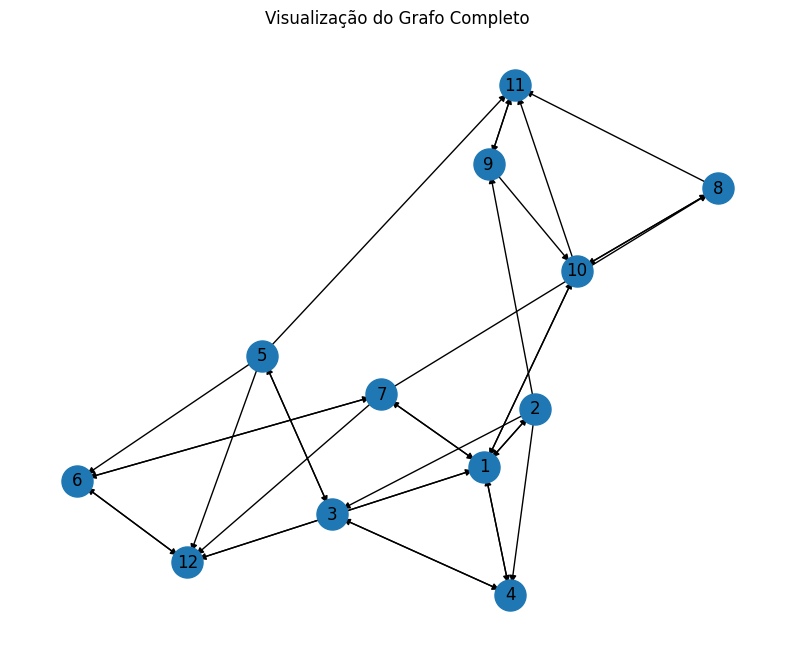

In [8]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import pydot

#  * Exemplo de formato de JSON esperado
#  * {
#   "estatisticas": {
#     "numVertices": 2,
#     "numArestas": 1,
#     "numArcos": 0,
#     "numVerticesRequeridos": 1,
#     "numArestasRequeridas": 1,
#     "numArcosRequeridos": 0,
#     "densidade": 1.0,
#     "componentes": 1,
#     "grauMin": 1,
#     "grauMax": 1,
#     "caminhoMedio": 10.0,
#     "diametro": 10,
#     "intermediacao": [0, 0, 0]
#   },
#   "grafo_dot": "digraph G {\\n  1 [label=\"1\"];\\n  2 [label=\"2\"];\\n  1 -> 2 [dir=both, arrowtail=none, arrowhead=none, label=\"10\"];\\n}"
# }

nomeArquivo = 'estatisticas_BHW1.json'

# Carrega o arquivo JSON
with open(nomeArquivo, 'r') as f:
    dados = json.load(f)

# Exibe as estatísticas
estatisticas = dados['estatisticas']
print("=== Estatísticas do Grafo ===")
for chave, valor in estatisticas.items():
    print(f"{chave}: {valor}")

# Lê a string DOT e cria o grafo com NetworkX
dot_data = dados['grafo_dot']
(pydot_graph,) = pydot.graph_from_dot_data(dot_data)
G = nx.DiGraph(nx.nx_pydot.from_pydot(pydot_graph))

# Desenha o grafo
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.title("Visualização do Grafo Completo")
plt.axis('off')
plt.show()
